In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Without Remanence

45.0 -25.0


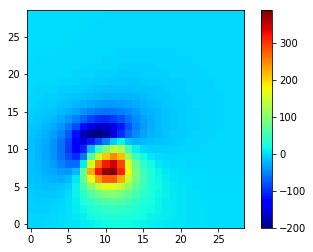

In [3]:
ydat = []
xdat = []
zdat = []
MagData = []
i = 0
dataf ='obs_noremanence.dat'
with open(dataf) as f: 
    for line in f: 

        if (i==0):
            InduceField_incl, InduceField_decl, geomag = line.split()
            InduceField_incl = float(InduceField_incl)
            InduceField_decl = float(InduceField_decl)
            geomag = float(geomag)
        elif (i==1):
            M_incl, M_decl, M = line.split()
            M_incl = float(M_incl)
            M_decl = float(M_decl)
            M = float(M)
        elif (i==2):
            ndat = int(line)
        else:
            arr = line.split()
            ydat.append(float(arr[0]))
            xdat.append(float(arr[1]))
            zdat.append(float(arr[2]))
            MagData.append(float(arr[3]))
            
        i+=1

count = 0

n = int(np.sqrt(ndat))
x = np.zeros(n)
y = np.zeros(n)
MD= np.zeros((n,n))
for i in range(0,n):
    x[i] = xdat[count]
    for j in range(0, n):
        y[j] = ydat[count]
        MD[j,i] = MagData[count]
        count+=1
        
[X, Y] = np.meshgrid(x, y)
print(InduceField_incl, InduceField_decl)
plt.imshow(MD, origin='lower', cmap='jet')
plt.colorbar()
    

In [5]:
def magsus(xb,xe,yb,ye,zb,ze,theta,sus,x,y,z,dincl,ddecl,geomag):
    """%
    % function [bx,by, bz]=magsus(xb,xe,yb,ye,zb,ze,theta,x,y,z,...
    %                             sus,dincl,ddecl,geomag)
    %
    % computes the three components of magnetic field due to a
    % cuboidal prism with a constant susceptibility
    %
    %Inputs:
    % xb, xe: beginning and ending x-coord of the prism
    % yb, ye: beginning and ending y-coord of the prism
    % zb, ze: beginning and ending z-coord of the prism
    % theta:  rotation angle of the prism w.r.t north
    % sus:    susceptibility
    %
    % x,y,z:  observation stored in arrays
    %
    % dincl,ddecl: inclination and declination of the magnetization
    %              (1) same direction as the inducing field if only
    %                  induced magnetization is considered
    %              (2) arbitrary direction to simulate total magnetization
    %                  in a different direction from inducing field
    % geomag:      inducing field strength: geomag and sus are used to 
    %              specify intuitively the magnetization strength
    %
    %
    % Outout:
    % bx,by,bz:   magnetic anomaly (array has the same shape as x, y, or z)
    %
    %------------------------------------------------------------------
    % Author: Yaoguo Li
    %"""

    geomag = 60000
    
    fact=geomag*sus/(4.0*np.pi)
    theta=theta*np.pi/180.0
    # rotation matrix
    tran = np.zeros(2)
    tran[0]=np.cos(theta) 
    tran[1]=np.sin(theta)
    
    #% calculate the direction cosine of the geomagnetic field:
    #% in the rotated system which aligns with the sides of the
    #% prism.

    di=np.pi*dincl/180.0
    dd=np.pi*ddecl/180.0


    cx=np.cos(di)*np.cos(dd-theta)*fact
    cy=np.cos(di)*np.sin(dd-theta)*fact
    cz=np.sin(di)*fact

    #% findind the width and center of the prism:
    xc=0.5*(xe+xb) 
    xwidth=0.5*(xe-xb)
    yc=0.5*(ye+yb)
    ywidth=0.5*(ye-yb)

    xcntr= xc*tran[0] + yc*tran[1]
    ycntr=-xc*tran[1] + yc*tran[0]

    #% observation location in the rotated coordinate system
    x0= x*tran[0] + y*tran[1]
    y0=-x*tran[1] + y*tran[0]


    #% Note: all the horizontal components are rotated to the new
    #% coord system. They must be rotated back to the original system.


    #% begin the calculation
    a1=xcntr-xwidth-x0
    a2=xcntr+xwidth-x0
    b1=ycntr-ywidth-y0
    b2=ycntr+ywidth-y0
    h1=zb-z
    h2=ze-z

    r111=np.sqrt(a1**2 + b1**2 + h1**2)
    r112=np.sqrt(a1**2 + b1**2 + h2**2)
    r211=np.sqrt(a2**2 + b1**2 + h1**2)
    r212=np.sqrt(a2**2 + b1**2 + h2**2)

    r121=np.sqrt(a1**2 + b2**2 + h1**2)
    r122=np.sqrt(a1**2 + b2**2 + h2**2)

    r221=np.sqrt(a2**2 + b2**2 + h1**2)
    r222=np.sqrt(a2**2 + b2**2 + h2**2)

    #%----1/(DyDz) term
    top1=(a2 + r222)
    bot1=(a1 + r122)
    top2=(a1 + r121)
    bot2=(a2 + r221)
    top3=(a1 + r112)
    bot3=(a2 + r212)
    top4=(a2 + r211)
    bot4=(a1 + r111)

    top=np.multiply(np.multiply(top1,top2),np.multiply(top3,top4))
    bot=np.multiply(np.multiply(bot1,bot2),np.multiply(bot3,bot4))

    tyz=np.log(np.divide(top,bot))

    #%----1/(DxDz) term
    top1=(b2 + r222)
    bot1=(b1 + r212)

    top2=(b1 + r211)
    bot2=(b2 + r221)

    top3=(b1 + r112)
    bot3=(b2 + r122)

    top4=(b2 + r121)
    bot4=(b1 + r111)
    
    top=np.multiply(np.multiply(top1,top2),np.multiply(top3,top4))
    bot=np.multiply(np.multiply(bot1,bot2),np.multiply(bot3,bot4))
    

    txz=np.log(np.divide(top,bot))

    #%----1/(DxDy) term
    top1=(h2 + r222)
    bot1=(h1 + r221)

    top2=(h1 + r211)
    bot2=(h2 + r212)

    top3=(h1 + r121)
    bot3=(h2 + r122)

    top4=(h2 + r112)
    bot4=(h1 + r111)

    top=np.multiply(np.multiply(top1,top2),np.multiply(top3,top4))
    bot=np.multiply(np.multiply(bot1,bot2),np.multiply(bot3,bot4))

    txy=np.log(np.divide(top,bot))

    tol=0.0*a1 + 1.0e-10
    

    #%----1/(DxDx) term

    delt=np.multiply(np.sign(a1),np.maximum(np.abs(a1),tol)) + (1-np.abs(np.sign(a1)))*tol   
    txx=    - np.arctan(np.multiply(b1,h2)/(np.multiply(r112,delt))) + np.arctan((np.multiply(b1,h1)/(np.multiply(r111,delt))))
    txx = txx + np.arctan(np.multiply(b2,h2)/(np.multiply(r122,delt))) - np.arctan(np.multiply(b2,h1)/(np.multiply(r121,delt)))

    
    delt=np.multiply(np.sign(a2),np.maximum(np.abs(a2),tol)) + (1-np.abs(np.sign(a2)))*tol  
    #this one!
    txx = txx +  np.arctan(np.multiply(b1,h2)/(np.multiply(r212,delt))) -  np.arctan(np.multiply(b1,h1)/(np.multiply(r211,delt)))  
    txx = txx - np.arctan(np.multiply(b2,h2)/(np.multiply(r222,delt))) +  np.arctan(np.multiply(b2,h1)/(np.multiply(r221,delt)))
                                                           

    #%----1/(DyDy) term
    delt=np.multiply(np.sign(b1),np.maximum(np.abs(b1),tol))+ (1-np.abs(np.sign(b1)))*tol
    tyy=    - np.arctan(np.multiply(a1,h2)/(np.multiply(r112,delt)))  + np.arctan(np.multiply(a1,h1)/(np.multiply(r111,delt))) 
    tyy=tyy + np.arctan(np.multiply(a2,h2)/(np.multiply(r212,delt)))  - np.arctan(np.multiply(a2,h1)/(np.multiply(r211,delt))) 
    
    delt=np.multiply(np.sign(b2),np.maximum(np.abs(b2),tol)) + (1-np.abs(np.sign(b2)))*tol
    tyy=tyy + np.arctan(np.multiply(a1,h2)/(np.multiply(r122,delt)))  - np.arctan(np.multiply(a1,h1)/(np.multiply(r121,delt))) 
    tyy=tyy - np.arctan(np.multiply(a2,h2)/(np.multiply(r222,delt)))  + np.arctan(np.multiply(a2,h1)/(np.multiply(r221,delt))) 
    

                                                                                 
    #%---1/(DzDz) term
    tzz= - (txx + tyy)
    
    #% mag components
    bx0=txx.dot(cx) + txy.dot(cy) + txz.dot(cz)
    by0=txy.dot(cx) + tyy.dot(cy) + tyz.dot(cz)
    bz=txz.dot(cx) + tyz.dot(cy) + tzz.dot(cz)
    
    #% rotate Bx and By back to original system
    bx= tran[0]*bx0 - tran[1]*by0
    by= tran[1]*bx0 + tran[0]*by0
    
    return [bx, by, bz]

In [142]:

def FM(incl_induced, decl_induced):
    #create model 
    model = np.zeros((10,20,20)) #3d array 
    model[1:5,3:8,3:8] = 0.04
    indicator = np.zeros((10,20,20))
    indicator[1:4,3:8,3:8] = 1 #1:5

    #read data
    meshf = 'mesh'
    dataf = 'obs.loc'#;  % the only difference between obs1.loc and obs2.loc is that, in obs2.loc, I used the declination and inclination from Furnas.

    i = 0
    with open(meshf) as f:
        for line in f:
            if (i==0):
                arr = line.split()
                my = int(arr[0])
                mx = int(arr[1])
                mz = int(arr[2])
                print(mz)
            elif (i==1):
                arr = line.split()
                x0 = int(arr[0])
                y0 = int(arr[1])
                z0 = int(arr[2])
            elif (i==2):
                arr = line.split()
                dely = np.array(arr).astype(float)
            elif(i == 3):
                arr = line.split()
                delx = np.array(arr).astype(float)
            elif(i==4):
                arr = line.split()
                delz = np.array(arr).astype(float)
            i+=1

    model = np.reshape(model,(mz,my,mx))
    indicator = np.reshape(indicator,(mz,my,mx))

    #mods have off by one error, please fix
    xmod=np.zeros(mx)
    xmod[0]=x0
    for i in range(0,mx-1):
        xmod[i+1]=xmod[i]+delx[i]

    x_extra = int(xmod[-1]+delx[-1])
    xmod = np.append(xmod, x_extra)

    ymod=np.zeros(my)
    ymod[0]=y0
    for i in range(0,my-1):
        ymod[i+1]=ymod[i]+dely[i]

    y_extra = int(ymod[-1]+dely[-1])
    ymod = np.append(ymod, y_extra)

    zmod=np.zeros(mz)
    zmod[0]=z0
    for i in range(0,mz-1):
        zmod[i+1]=zmod[i]+delz[i]
    z_extra = int(zmod[-1]+delz[-1])
    zmod = np.append(zmod, z_extra)
    mcel=mx*my*mz;
    

    i = 0

    with open(dataf) as f:
        for line in f:
            if (i==0):
                arr = line.split()
                InduceField_incl = incl_induced#float(arr[0])
                InduceField_decl = decl_induced#float(arr[1])
                geomag = float(arr[2])

            elif (i==1):
                ndat = int(line)
                xdat = np.zeros(ndat)
                ydat = np.zeros(ndat)
                zdat = np.zeros(ndat)
                j = 0
            else:
                arr = line.split()
                ydat[j] = float(arr[0])
                xdat[j] = float(arr[1])
                zdat[j] = float(arr[2])
                j+=1
            i+=1


    zdat=-zdat

    theta = 0.0
    icel = 0
    MagData = np.zeros(ndat)

    for i in range(0,mx-1):
        xb=xmod[i]
        xe=xmod[i+1]
        for j in range(0,my-1):
            yb=ymod[j]
            ye=ymod[j+1]
            for k in range(0,mz-1):
                zb=zmod[k]
                ze=zmod[k+1]

                if (model[k,j,i]!=0):

                    sus = model[k,j,i]
                    icel=icel+1

                    dincl = InduceField_incl
                    ddecl = InduceField_decl


                    [bx,by,bz]=magsus(xb,xe,yb,ye,zb,ze,theta,sus,xdat,ydat,zdat,dincl,ddecl,geomag)

                    di = InduceField_incl*np.pi/180.0
                    dd = InduceField_decl*np.pi/180.0
                    MagData = np.add(MagData,bx*np.cos(di)*np.cos(dd)+by*np.cos(di)*np.sin(dd)+bz*np.sin(di))


    n = int(np.sqrt(ndat))
    count = 0
    MD = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0, n):
            MD[j,i] = MagData[count]
            count+=1

    return [MagData, MD, n]



10


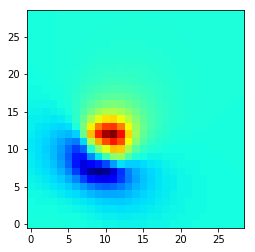

In [143]:
md = FM(-40,25)[1]
plt.imshow(md,origin = 'lower', cmap='jet')


10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


KeyboardInterrupt: 

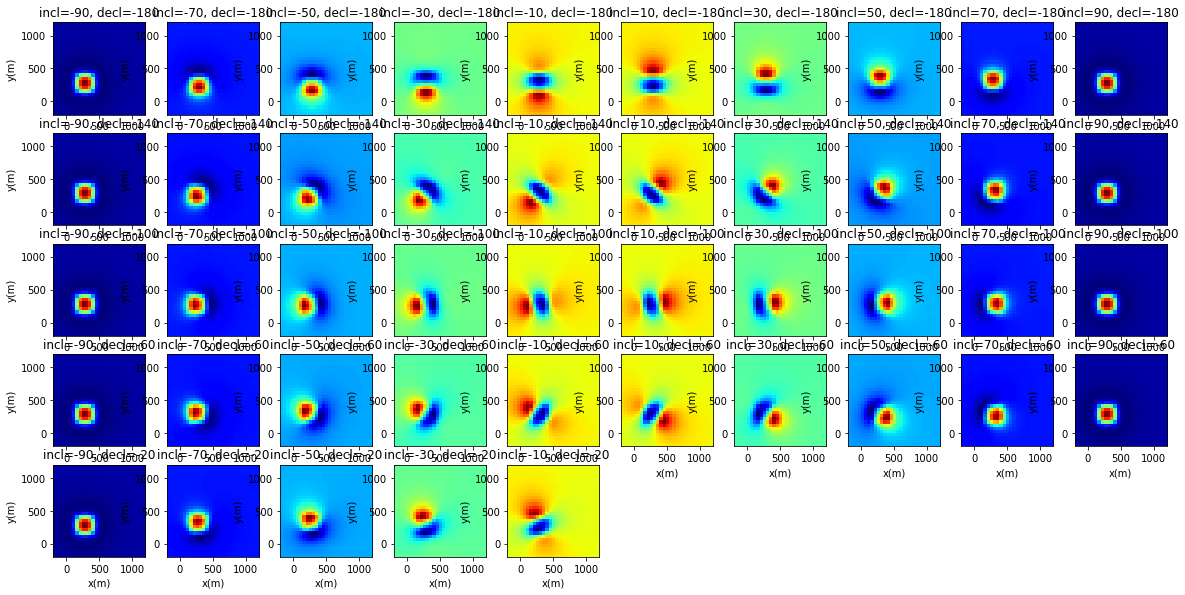

In [144]:
from PIL import Image

incli = np.linspace(-90, 90, 10)
decli = np.linspace(-180, 180, 10)
n = len(incli)
count = 0
mstore = [] #I, D, Im, Dm, nData, Model Vector, sqrt(nD)  
plt.figure(figsize=(20,20))
for i in range(0,n):
    for j in range(0,n):
        plt.subplot(n,n,count+1)
        [mag1d, mag2d, nD] = FM(incli[j], decli[i])
        mstore.append(mag1d)
        plt.title("incl=%i, decl=%i"%(incli[j], decli[i]))
        plt.imshow(mag2d, origin='lower', cmap='jet', extent=[-200,1200,-200,1200])
        plt.xlabel('x(m)')
        plt.ylabel('y(m)')
        count+=1


        
plt.tight_layout()

In [ ]:
#storing them 
fout = "without_rem.csv"
outf = open(fout, "w")
count = 0
for i in range(0,n):
    for j in range(0,n):
        ##plt.subplot(n,n,count+1)
        #[mag1d, mag2d, nD] = FM(incli[j], decli[i])
        outf.write(str(incli[j]))
        outf.write('\t')
        outf.write(str(decli[i]))
        outf.write('\t')
        outf.write(str(incli[j]))
        outf.write('\t')
        outf.write(str(decli[i]))
        outf.write('\t')
        outf.write(str(nD))
        outf.write('\t')
        for k in range(0,int(nD*nD)):
            outf.write(str(mstore[count][k]))
            outf.write('\t')
            
        outf.write('\n')
        count+=1


# With Remanence

In [ ]:
ydat = []
xdat = []
zdat = []
MagData = []
i = 0
dataf ='obs_remanence.dat'
with open(dataf) as f: 
    for line in f: 

        if (i==0):
            InduceField_incl, InduceField_decl, geomag = line.split()
            print("geomag:", geomag)
            InduceField_incl = float(InduceField_incl)
            InduceField_decl = float(InduceField_decl)
            geomag = float(geomag)
        elif (i==1):
            M_incl, M_decl, M = line.split()
            M_incl = float(M_incl)
            M_decl = float(M_decl)
            M = float(M)
        elif (i==2):
            ndat = int(line)
        else:
            arr = line.split()
            ydat.append(float(arr[0]))
            xdat.append(float(arr[1]))
            zdat.append(float(arr[2]))
            MagData.append(float(arr[3]))
            
        i+=1

count = 0

n = int(np.sqrt(ndat))
x = np.zeros(n)
y = np.zeros(n)
MD= np.zeros((n,n))
for i in range(0,n):
    x[i] = xdat[count]
    for j in range(0, n):
        y[j] = ydat[count]
        MD[j,i] = MagData[count]
        count+=1
        
[X, Y] = np.meshgrid(x, y)
print(InduceField_incl, InduceField_decl)
print(M_incl, M_decl)
plt.imshow(MD, origin='lower', cmap='jet', extent=[-200,1200,-200,1200])
plt.xlabel("x (m)")
plt.ylabel("y(m)")
plt.colorbar()
    

In [145]:
def FM_rem(incl, decl, inclM, declM):
    model = np.zeros((10,20,20)) #3d array 
    model[1:5,3:8,3:8] = 0.04
    indicator = np.zeros((10,20,20))
    indicator[1:5,3:8,3:8] = 1

    Rem1_incl = inclM
    Rem1_decl = declM
    

    meshf = 'mesh'
    dataf = 'obs.loc'

    i = 0
    with open(meshf) as f:
        for line in f:
            if (i==0):
                arr = line.split()
                my = int(arr[0])
                mx = int(arr[1])
                mz = int(arr[2])
            elif (i==1):
                arr = line.split()
                x0 = int(arr[0])
                y0 = int(arr[1])
                z0 = int(arr[2])
            elif (i==2):
                arr = line.split()
                dely = np.array(arr).astype(float)
            elif(i == 3):
                arr = line.split()
                delx = np.array(arr).astype(float)
            elif(i==4):
                arr = line.split()
                delz = np.array(arr).astype(float)
            i+=1

    model = np.reshape(model, (mz,mx,my))
    indicator = np.reshape(indicator, (mz,mx,my))
    xmod=np.zeros(mx)
    xmod[0]=x0
    for i in range(0,mx-1):
        xmod[i+1]=xmod[i]+delx[i]
    x_extra = int(xmod[-1]+delx[-1])
    xmod = np.append(xmod, x_extra)

    ymod=np.zeros(my)
    ymod[0]=y0
    for i in range(0,my-1):
        ymod[i+1]=ymod[i]+dely[i]

    y_extra = int(ymod[-1]+dely[-1])
    ymod = np.append(ymod, y_extra)

    zmod=np.zeros(mz)
    zmod[1]=z0
    for i in range(0,mz-1):
        zmod[i+1]=zmod[i]+delz[i]
    z_extra = int(zmod[-1]+delz[-1])
    zmod = np.append(zmod, z_extra)


    mcel=mx*my*mz
    i=0
    with open(dataf) as f:
        for line in f:
            if (i==0):
                arr = line.split()
                InduceField_incl = incl#float(arr[0])
                InduceField_decl = decl#float(arr[1])
                geomag = float(arr[2])

            elif (i==1):
                ndat = int(line)
                xdat = np.zeros(ndat)
                ydat = np.zeros(ndat)
                zdat = np.zeros(ndat)
                j = 0
            else:
                arr = line.split()
                ydat[j] = float(arr[0])
                xdat[j] = float(arr[1])
                zdat[j] = float(arr[2])
                
                j+=1
            i+=1
    zdat =-zdat

    theta = 0
    icel = 0
    MagData = np.zeros(ndat)

    for i in range(0,mx-1):
        xb=xmod[i]
        xe=xmod[i+1]
        for j in range(0,my-1):
            yb=ymod[j]
            ye=ymod[j+1]
            for k in range(0,mz-1):
                zb=zmod[k]
                ze=zmod[k+1]

                if (model[k,j,i]!=0):
                    sus = model[k,j,i]
                    icel=icel+1

                    if (indicator[k,j,i] == 1):
                        dincl = Rem1_incl
                        ddecl = Rem1_decl
                        [bx,by,bz]=magsus(xb,xe,yb,ye,zb,ze,theta,sus,xdat,ydat,zdat,dincl,ddecl,geomag)

                    #elif(indicator[k,j,i] == 2):
                    #    dincl = Rem2_incl
                    #    ddecl = Rem2_decl
                    #    [bx,by,bz]=magsus(xb,xe,yb,ye,zb,ze,theta,sus,xdat,ydat,zdat,dincl,ddecl,geomag)

                    di = InduceField_incl*np.pi/180.0
                    dd = InduceField_decl*np.pi/180.0
                    MagData = np.add(MagData,bx*np.cos(di)*np.cos(dd)+by*np.cos(di)*np.sin(dd)+bz*np.sin(di))


    n = int(np.sqrt(ndat))
    count = 0
    MD = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0, n):
            MD[j,i] = MagData[count]
            count+=1
    return [MagData, MD, n]



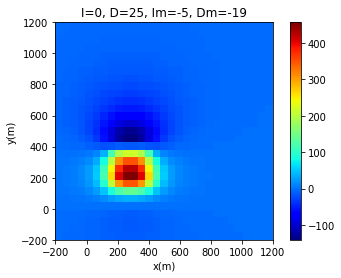

In [146]:
I = 0
D = 25
Im = -5.7
Dm = -19.8
[mag1d, mag2d, nD] = FM_rem(60, 180.00,30, 0)
plt.title("I=%i, D=%i, Im=%i, Dm=%i" %(I,D, Im, Dm))
plt.imshow(mag2d, origin="lower", cmap="jet", extent=[-200,1200, -200,1200])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.colorbar()


### Changing Inducing Field

Magnetization Direction: Im, Dm =  -5.7 -19.8
P r o c e s s i n g....
D o n e!


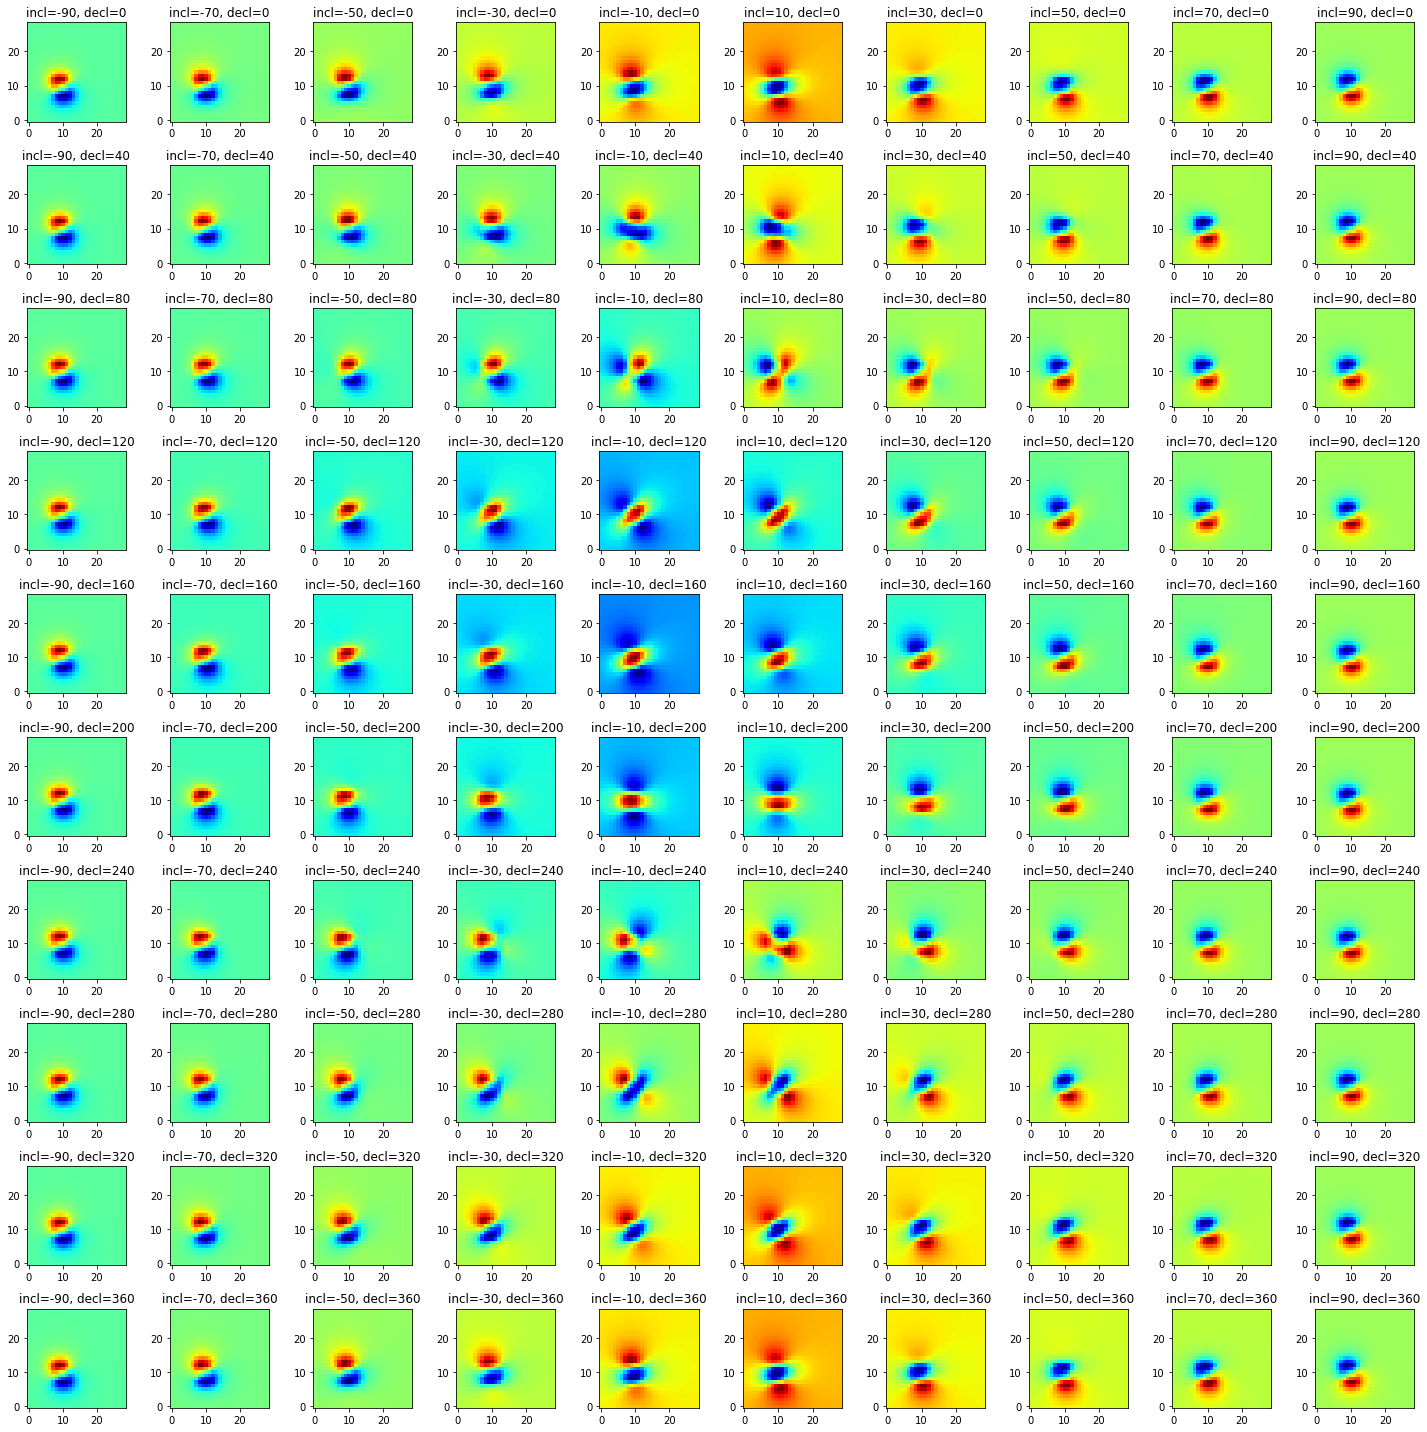

In [147]:
incli = np.linspace(-90, 90, 10)
decli = np.linspace(0, 360, 10)
n = len(incli)
count = 0
mstore = []
plt.figure(figsize=(20,20))
print("Magnetization Direction: Im, Dm = ", Im, Dm)
print("P r o c e s s i n g....")
for i in range(0,n):
    for j in range(0,n):
        plt.subplot(n,n,count+1)
        [mag1d, mag2d, nD] = FM_rem(incli[j], decli[i], Im, Dm)
        im = Image.fromarray(mag2d)
        mstore.append(mag1d)
        plt.title("incl=%i, decl=%i"%(incli[j], decli[i]))
        plt.imshow(mag2d, origin='lower', cmap='jet')
        count+=1
plt.tight_layout()
print("D o n e!")
#induced field fixed: 
#I=45
#D=30

In [148]:
#storing them 
fout = "with_rem_change_ind_field.csv"
outf = open(fout, "w")
count = 0
for i in range(0,n):
    for j in range(0,n):
        ##plt.subplot(n,n,count+1)
        #[mag1d, mag2d, nD] = FM(incli[j], decli[i])
        outf.write(str(incli[j]))
        outf.write('\t')
        outf.write(str(decli[i]))
        outf.write('\t')
        outf.write(str(Im))
        outf.write('\t')
        outf.write(str(Dm))
        outf.write('\t')
        outf.write(str(nD))
        outf.write('\t')
        for k in range(0,100):
            outf.write(str(mstore[count][k]))
            outf.write('\t')
            
        outf.write('\n')
        count+=1
outf.close()


### Changing Magnetization

Inducing Field Direction: I, D =  45 15
P r o c e s s i n g....
D o n e...


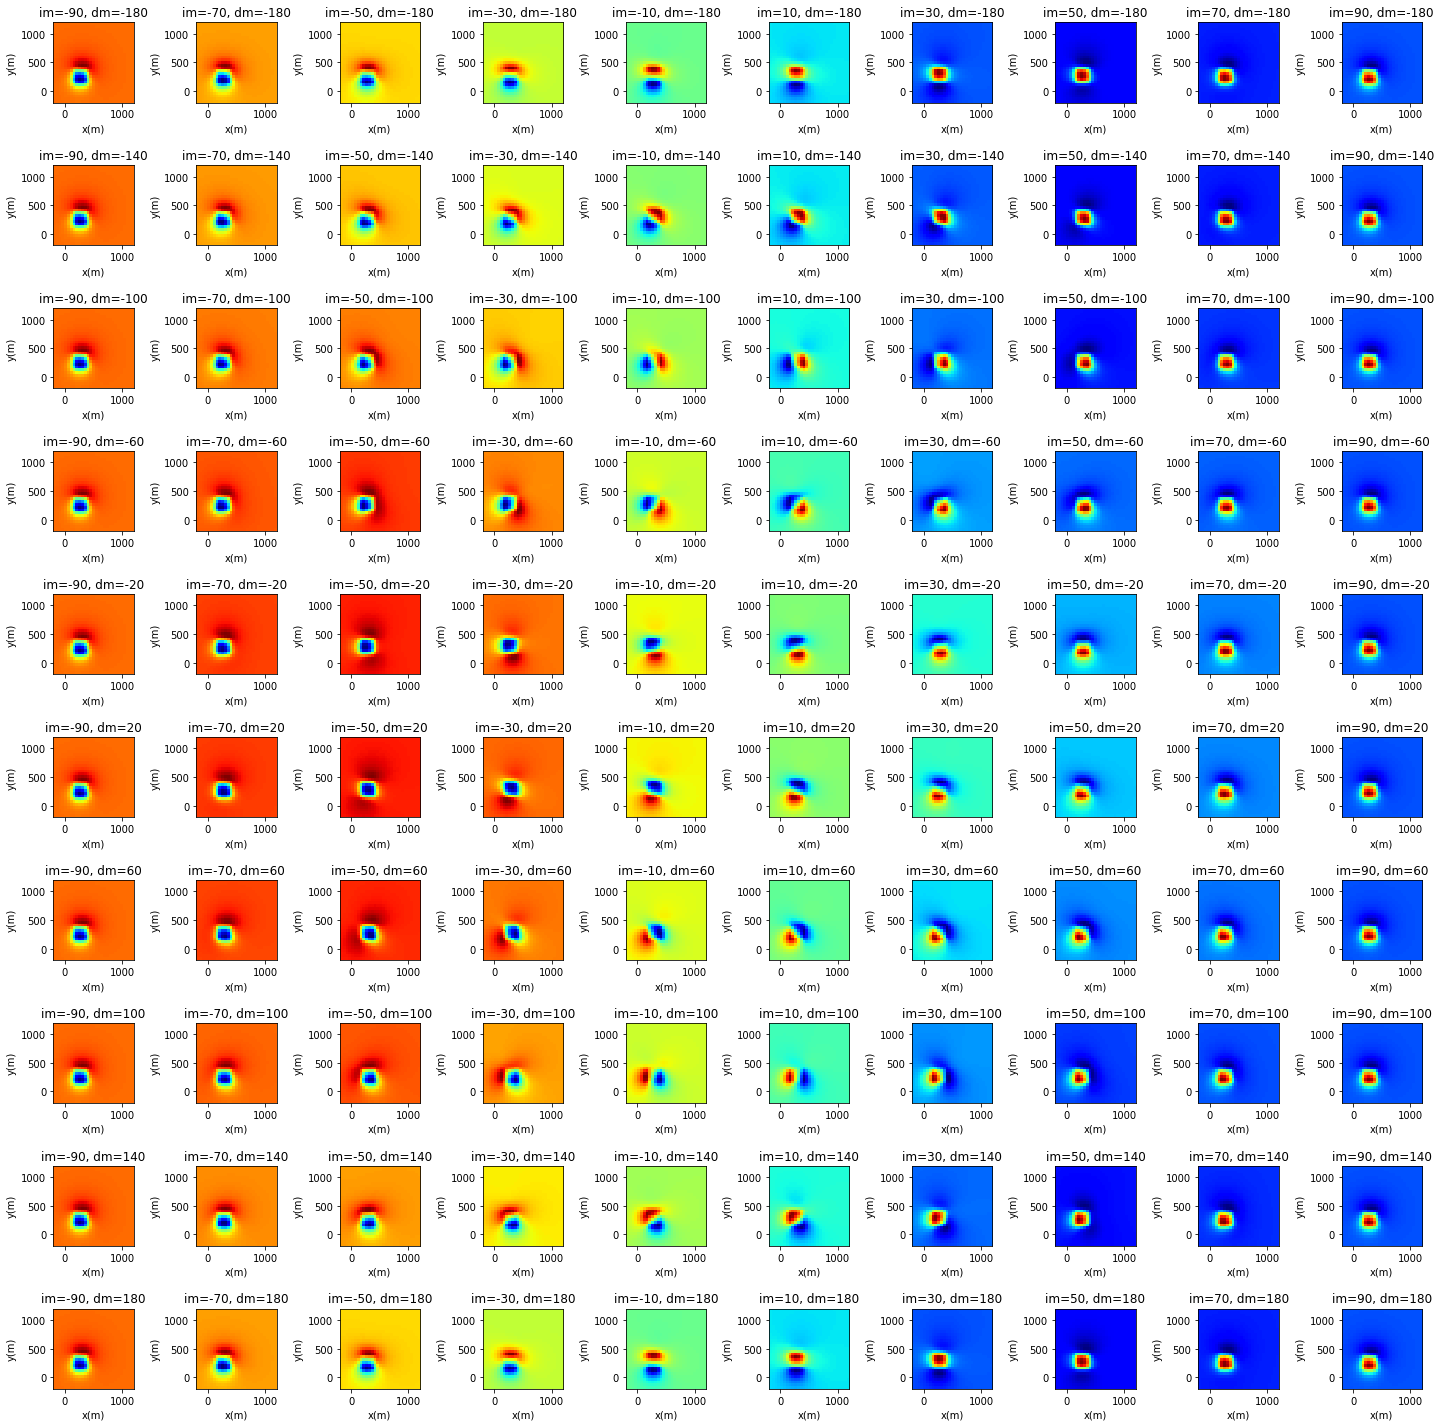

In [149]:
#for plotting reason
incli = np.linspace(-90, 90, 10)
decli = np.linspace(-180, 180, 10)

I = 45
D = 15

n = len(incli)
m = len(decli)
count = 0
mstore = []
plt.figure(figsize=(20,20))
print("Inducing Field Direction: I, D = ", I, D)
print("P r o c e s s i n g....")
for i in range(0,n):
    for j in range(0,n):
        plt.subplot(n,m,count+1)
        [mag1d, mag2d, nD] = FM_rem(I, D, incli[j], decli[i])
        mstore.append(mag1d)
        plt.title("im=%i, dm=%i"%(incli[j], decli[i]))
        plt.imshow(mag2d, origin='lower', cmap='jet', extent=[-200, 1200, -200, 1200])
        plt.xlabel('x(m)')
        plt.ylabel('y(m)')
        count+=1
print("D o n e...")
        
plt.tight_layout()

In [132]:
incli = np.arange(-90, 92, 2)
decli = np.arange(-180, 180, 2)

I = 45
D = 15
print(incli)



[-90 -88 -86 -84 -82 -80 -78 -76 -74 -72 -70 -68 -66 -64 -62 -60 -58 -56
 -54 -52 -50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20
 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16
  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52
  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88
  90]


In [133]:
n = len(incli)
m = len(decli)
count = 0
mstore = []
#plt.figure(figsize=(20,20))
print("Inducing Field Direction: I, D = ", I, D)
print("P r o c e s s i n g....")
for i in range(0,m):
    for j in range(0,n):
       # plt.subplot(n,n,count+1)
        [mag1d, mag2d, nD] = FM_rem(I, D, incli[j], decli[i])
        mstore.append(mag1d)
       # plt.title("im=%i, dm=%i"%(incli[j], decli[i]))
       # plt.imshow(mag2d, origin='lower', cmap='jet')
        count+=1
print("D o n e...")
        
plt.tight_layout()

Inducing Field Direction: I, D =  45 15
P r o c e s s i n g....
D o n e...


<Figure size 432x288 with 0 Axes>

In [134]:
#storing them 
fout = "with_rem_change_magnetization_model150m_New.csv"
outf = open(fout, "w")
count = 0
for i in range(0,m):
    for j in range(0,n):
        ##plt.subplot(n,n,count+1)
        #[mag1d, mag2d, nD] = FM(incli[j], decli[i])
        outf.write(str(I))
        outf.write('\t')
        outf.write(str(D))
        outf.write('\t')
        outf.write(str(incli[j]))
        outf.write('\t')
        outf.write(str(decli[i]))
        outf.write('\t')
        outf.write(str(nD))
        outf.write('\t')
        for k in range(0,int(nD**2)):
            outf.write(str(mstore[count][k]))
            outf.write('\t')
            
        outf.write('\n')
        count+=1
outf.close()


In [13]:
print(count)

16380


In [18]:
print(decli)

[-180 -178 -176 -174 -172 -170 -168 -166 -164 -162 -160 -158 -156 -154
 -152 -150 -148 -146 -144 -142 -140 -138 -136 -134 -132 -130 -128 -126
 -124 -122 -120 -118 -116 -114 -112 -110 -108 -106 -104 -102 -100  -98
  -96  -94  -92  -90  -88  -86  -84  -82  -80  -78  -76  -74  -72  -70
  -68  -66  -64  -62  -60  -58  -56  -54  -52  -50  -48  -46  -44  -42
  -40  -38  -36  -34  -32  -30  -28  -26  -24  -22  -20  -18  -16  -14
  -12  -10   -8   -6   -4   -2    0    2    4    6    8   10   12   14
   16   18   20   22   24   26   28   30   32   34   36   38   40   42
   44   46   48   50   52   54   56   58   60   62   64   66   68   70
   72   74   76   78   80   82   84   86   88   90   92   94   96   98
  100  102  104  106  108  110  112  114  116  118  120  122  124  126
  128  130  132  134  136  138  140  142  144  146  148  150  152  154
  156  158  160  162  164  166  168  170  172  174  176  178]


In [ ]:
print()

### Both Changes

Magnetization Direction: Im, Dm =  -5.7 -19.8
P r o c e s s i n g....
81
D o n e!


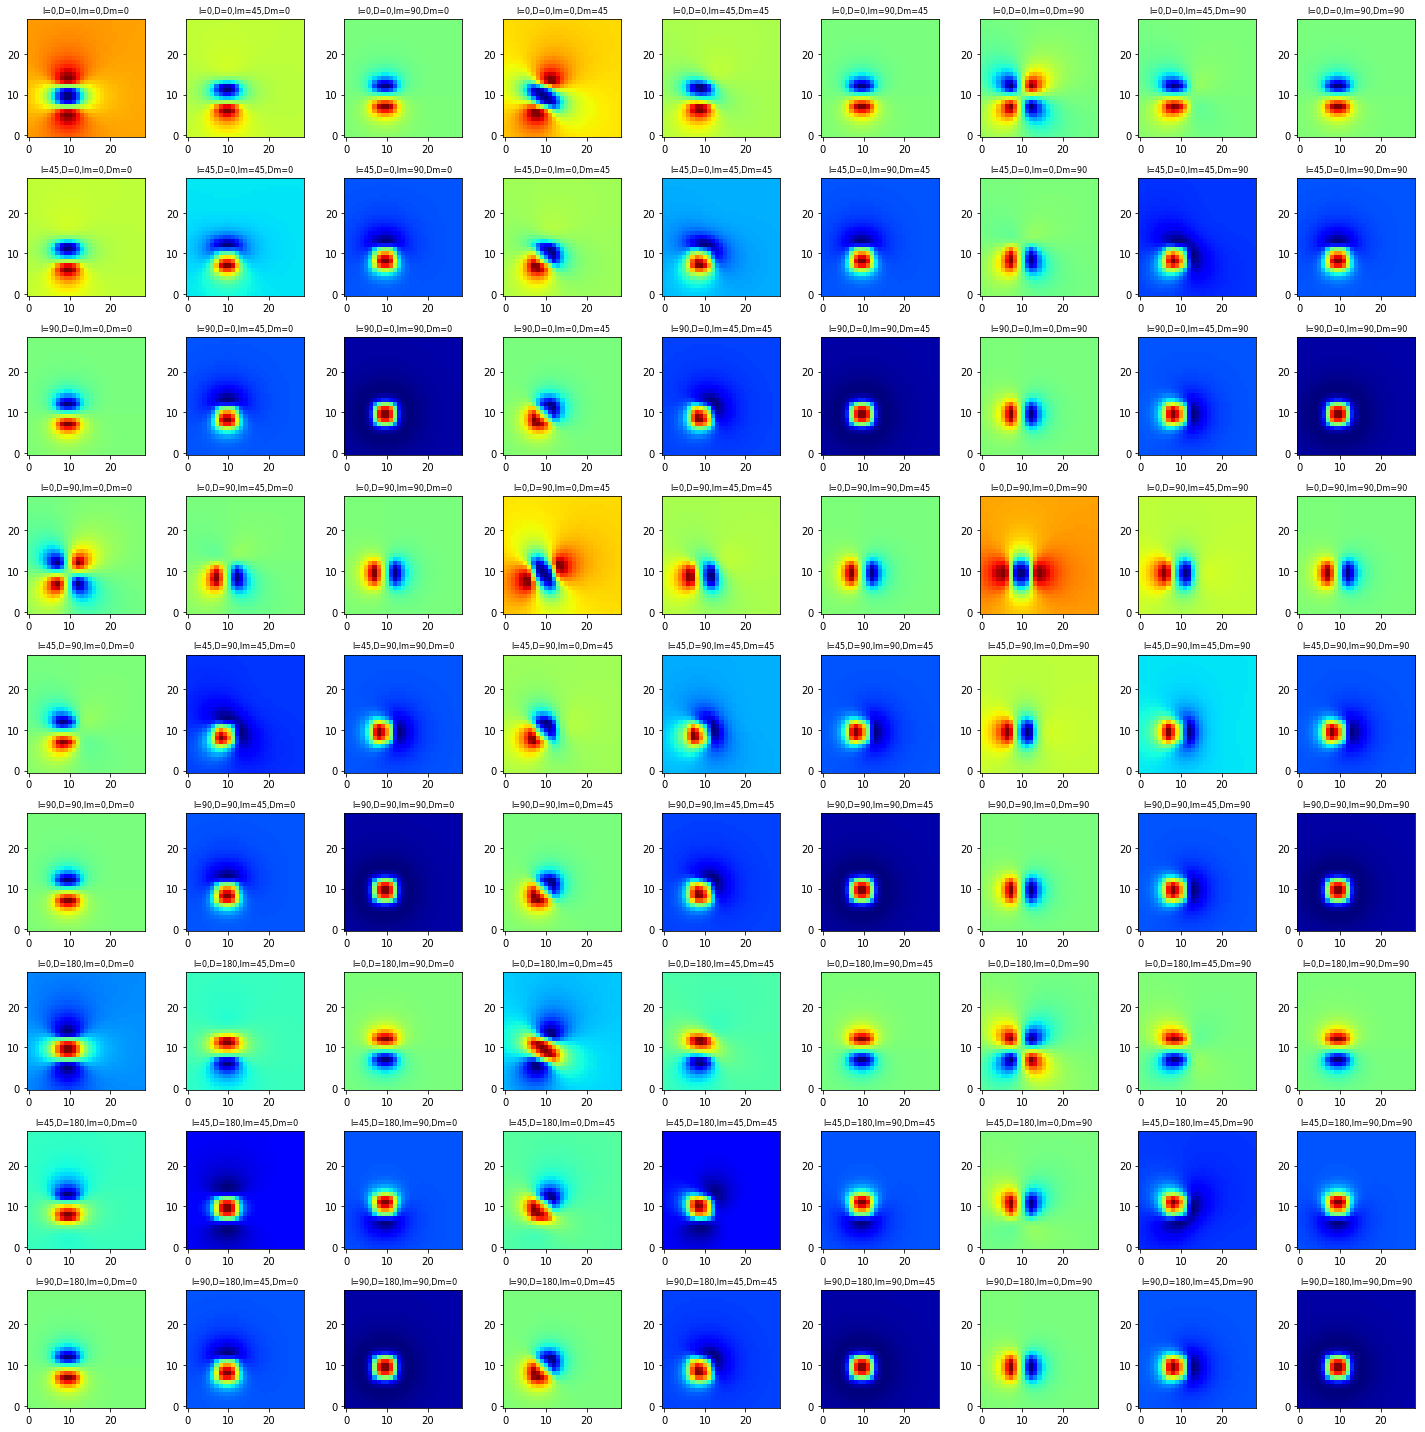

In [36]:
incli = np.linspace(0, 90, 3)
decli = np.linspace(0, 180, 3)
inclim = np.linspace(0, 90, 3)
declim = np.linspace(0,180, 3)

n = len(incli)
nn = len(inclim)
count = 0
mstore = []
plt.figure(figsize=(20,20))
print("Magnetization Direction: Im, Dm = ", Im, Dm)
print("P r o c e s s i n g....")
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,nn):
            for l in range(0,nn):
                plt.subplot(9,9,count+1)
                [mag1d, mag2d, nD] = FM_rem(incli[j], decli[i], inclim[l], inclim[k])
                mstore.append(mag1d)
                plt.title("I=%i,D=%i,Im=%i,Dm=%i"%(incli[j], decli[i], inclim[l], inclim[k]), fontsize=8)
                plt.imshow(mag2d, origin='lower', cmap='jet')
                count+=1
print(count)
plt.tight_layout()
print("D o n e!")

In [38]:
#storing them 
fout = "with_rem_change_ind_field_and_mag.csv"
outf = open(fout, "w")
count = 0
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            for l in range(0,n):

                outf.write(str(incli[j]))
                outf.write('\t')
                outf.write(str(decli[i]))
                outf.write('\t')
                outf.write(str(incli[l]))
                outf.write('\t')
                outf.write(str(decli[k]))
                outf.write('\t')
                outf.write(str(nD))
                outf.write('\t')
                for z in range(0,int(n*n*n*n)):
                    outf.write(str(mstore[count][z]))
                    outf.write('\t')
                outf.write('\n')
                count+=1
outf.close()


### Combining the All the Data if Needed

In [39]:
filenames = ['without_rem.csv', 'with_rem_change_ind_field.csv', 'with_rem_change_magnetization.csv', 'with_rem_change_ind_field_and_mag.csv']
fout = 'combined_data.csv'
outf = open(fout, "w")
count = 0
for file in filenames: 
    inf = open(file, "r")
    for line in inf:
        outf.write(line)
        count+=1
    

In [40]:
print(count)

381
